<a href="https://colab.research.google.com/github/singhomendra8184-cloud/ecommerce-customer-analysis/blob/main/ecommerce_customer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analytical Objective
The objective of this analysis is to evaluate customer value, engagement, and loyalty patterns in an e-commerce platform to support data-driven marketing and retention decisions.



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/singhomendra8184-cloud/ecommerce-customer-analysis/refs/heads/main/data/E-commerce%20Customer%20Behavior%20-%20Sheet1.csv"
df = pd.read_csv(url)

df.head()


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [3]:
df.shape
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

The dataset contains customer-level e-commerce information used to analyze purchasing behavior and customer value.


In [5]:
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

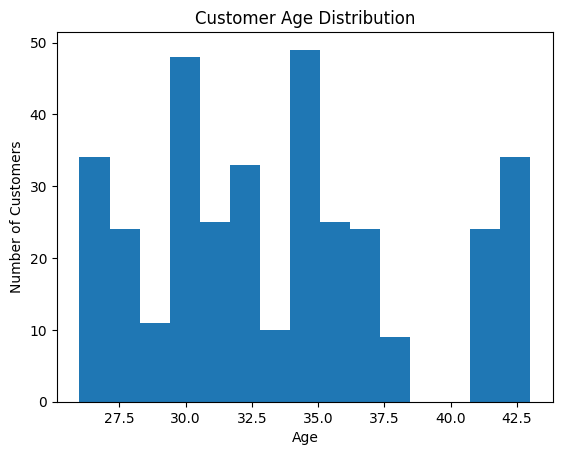

In [8]:
plt.hist(df['Age'], bins=15)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()



Most customers fall within a specific age range, indicating the platform’s core demographic segment.


In [16]:
bins = [18, 25, 35, 45, 60]
labels = ['18-25', '26-35', '36-45', '46-60']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)



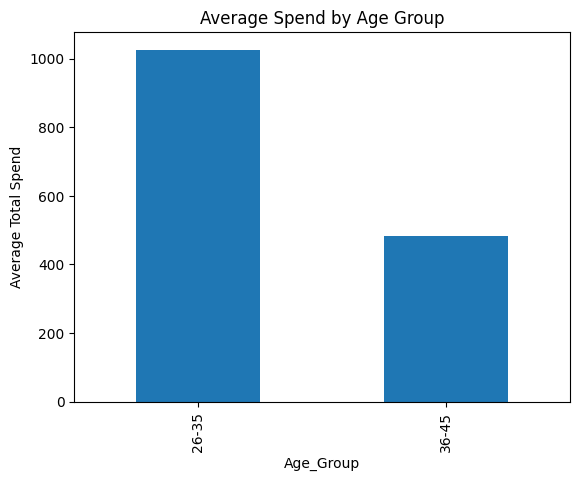

In [17]:
df.groupby('Age_Group', observed=True)['Total Spend'].mean().plot(kind='bar')
plt.title("Average Spend by Age Group")
plt.ylabel("Average Total Spend")
plt.show()


Customer spending varies across age groups, with certain age segments demonstrating higher average spending. This insight can help tailor targeted marketing and personalized offers.

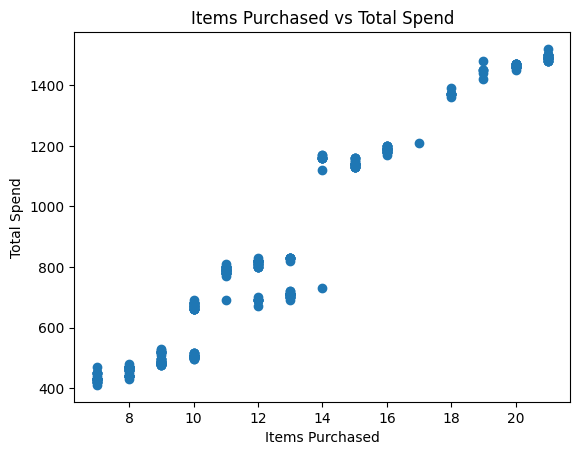

In [18]:
plt.scatter(df['Items Purchased'], df['Total Spend'])
plt.xlabel("Items Purchased")
plt.ylabel("Total Spend")
plt.title("Items Purchased vs Total Spend")
plt.show()


Customers who purchase more items tend to generate higher total spend, indicating a strong relationship between purchase frequency and customer value.

In [20]:
q1 = df['Total Spend'].quantile(0.33)
q2 = df['Total Spend'].quantile(0.66)

def segment(spend):
    if spend >= q2:
        return 'High Value'
    elif spend >= q1:
        return 'Medium Value'
    else:
        return 'Low Value'

df['Customer Segment'] = df['Total Spend'].apply(segment)


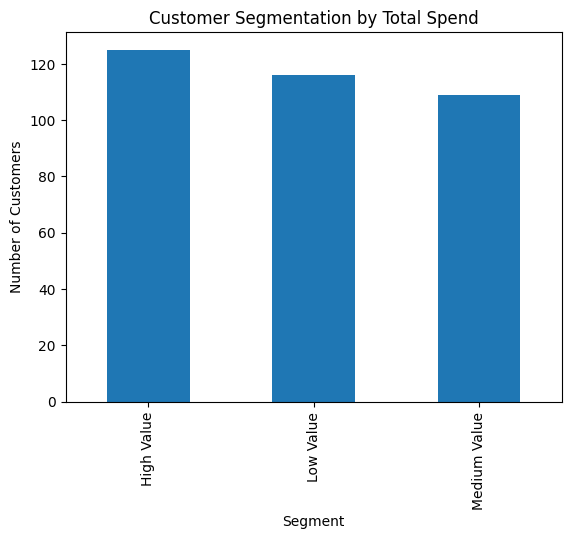

In [21]:
df['Customer Segment'].value_counts().plot(kind='bar')
plt.title("Customer Segmentation by Total Spend")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()


High-value customers form a smaller segment but contribute significantly to overall revenue.

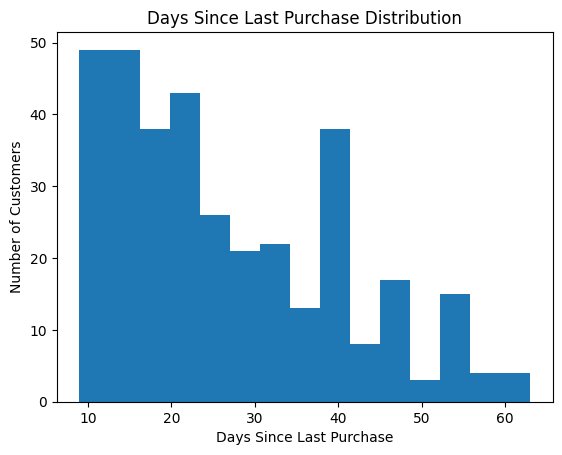

In [22]:
plt.hist(df['Days Since Last Purchase'], bins=15)
plt.title("Days Since Last Purchase Distribution")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Number of Customers")
plt.show()


Customers with higher recency values may be at risk of churn and can be targeted with re-engagement campaigns.

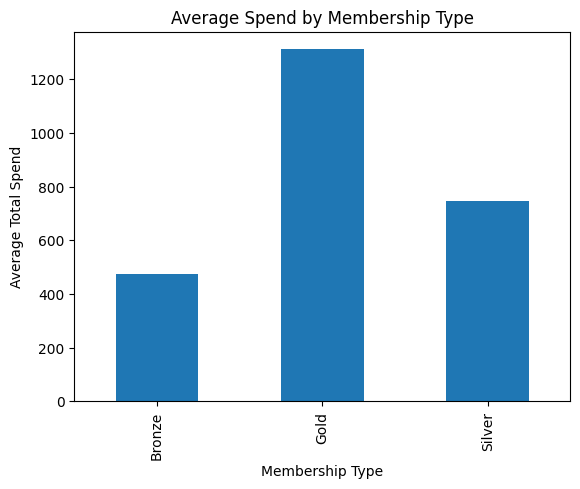

In [23]:
df.groupby('Membership Type')['Total Spend'].mean().plot(kind='bar')
plt.title("Average Spend by Membership Type")
plt.ylabel("Average Total Spend")
plt.show()


Premium membership types show higher average spending, validating the value of loyalty programs.


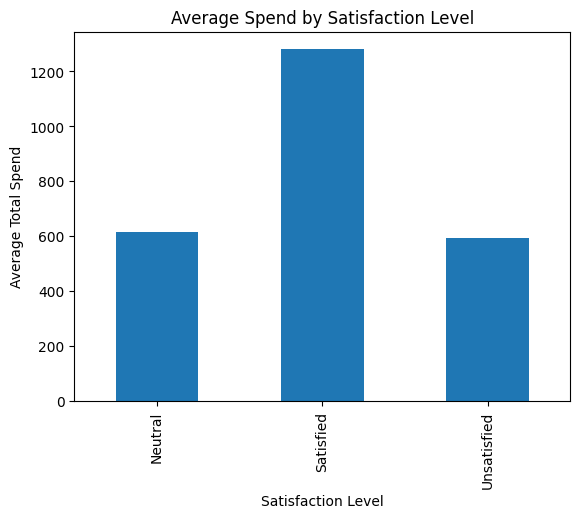

In [24]:
df.groupby('Satisfaction Level')['Total Spend'].mean().plot(kind='bar')
plt.title("Average Spend by Satisfaction Level")
plt.ylabel("Average Total Spend")
plt.show()


Higher satisfaction levels correlate with increased customer spending.

Executive Summary:

Customer spending is unevenly distributed, with high-value customers driving a large share of revenue

Purchase frequency has a strong positive relationship with total spend

Membership and satisfaction levels significantly influence customer value

Recency analysis identifies churn-risk customers for targeted retention strategies

Age and demographic segmentation support personalized marketing initiatives